# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

#  Multi-Factor Model: Short-Term Reversal

In this notebook, you will create a short-term reversal factor. And then combine it with the momentum factor to generate a multi-factor model. 

The following steps are performed while creating the multi-factor model:
1. Import the libraries and data 
2. Calculate the daily percentage change
4. Create a Short-Term Reversal based factor
5. Create a multi factor portfolio 

## Import the libraries and data 

### Import the libraries

You can first start by importing the libraries necessary which will be used later to get the data, store it, and create the factor based portfolio.

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Download the data
The stock data needed for creating the portfolio is downloaded from the '../data_modules/Stock_Prices_2012_To_2017_Factor.csv' file. You can find this file in the last unit of this course, containing all the downloadables.

In [2]:
df = pd.read_csv('../data_modules/Stock_Prices_2012_To_2017_Factor.csv', index_col=[0])

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').date

# Load the momentum factor created in the previous notebook
momentum_performance = pd.read_csv(
    '../data_modules/Momentum_Performance_2012_To_2017.csv', index_col=[0])

# Convert the index to datetime format
momentum_performance.index = pd.to_datetime(
    momentum_performance.index, format='%d-%m-%Y').date

## Calculate the daily percentage change

In [3]:
# Create a dataframe called df_change to hold the future returns of the stocks
df_change = df.pct_change().shift(-1)

# Drop the rows containing the null values
df_change.dropna(inplace=True)

## Create Short-Term Reversal based factor 

#### How does the factor work?

The reversal factor is created using the rolling mean of the past one week's price of a stock. If a stock's current price is above its past one week's average price then you sell the stock, and conversely, if it is below the mean you buy it. 

The assumption here is that the stock's price would revert back to their short term mean, so you go against the trend of the market and take a contrarian position.

In [4]:
# Here the value of t would be 5 as you are considering only the past one week's  data
weekly_working_days = 5

# Calculate the rolling mean of the prices and subtract it from prices
mean_reversion_factor = df - df.rolling(weekly_working_days).mean()

# Create two dataframes to hold the buy-sell signals for the rolling mean difference values of stocks
# The reversal_sell_stocks dataframe contains values of stocks that are above the rolling mean
reversal_sell_stocks = mean_reversion_factor[mean_reversion_factor > 0]

# The reversal_buy_stocks dataframe contains values of stocks that are below the rolling mean
reversal_buy_stocks = mean_reversion_factor[mean_reversion_factor < 0]

# Here you assume that the price will revert back to the rolling mean, so you sell the stock when the market goes
# above the moving average and buy the stock when the price is below the moving average

Like the momentum factor, here you sell those stocks that are in the reversal_sell_stocks dataframe and buy all those in the reversal_buy_stocks dataframe

In [5]:
# Calculate the factor performance using the returns and signals
mean_reversion_performance = (df_change * ~reversal_buy_stocks.isnull() - df_change
                              * ~reversal_sell_stocks.isnull()).mean(axis=1)

Convert the mean_reversion_performance to a dataframe with the column name as return and the index as a datatime format. When you create a multi-factor model by combining the two factors, their indexes should match, so we make the indexes of both momentum and mean_reversion factors as datetime.

In [6]:
# Convert the mean reversion performance to a dataframe
mean_reversion_performance = pd.DataFrame(
    mean_reversion_performance.dropna(), columns=['return'])

# Convert the mean reversion performance index to a datetime
mean_reversion_performance.index = pd.to_datetime(
    mean_reversion_performance.index, format='%Y-%m-%d')

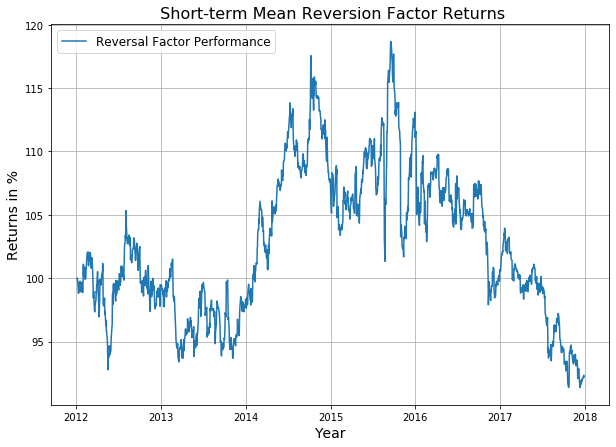

In [7]:
# Plot the performance of the factor
plt.figure(figsize=(10, 7))
plt.plot((mean_reversion_performance + 1).cumprod()
         * 100, label='Reversal Factor Performance')
plt.legend(loc='best', fontsize=12)
plt.title(' Short-term Mean Reversion Factor Returns', fontsize=16)
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid()
plt.show()

## Create a multi factor portfolio

Now you combine both the factors by giving them equal weight or equal capital allocation. You can take the average of their performances to generate the final portfolio performance.

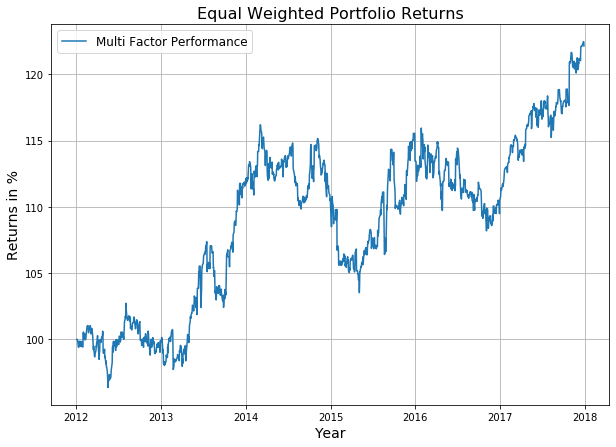

In [8]:
# Give 50% of the capital to both the factors and calulate the returns of the final combined model
plt.figure(figsize=(10, 7))

# We use the index of mean_reversion_performance as the X-axis to represent the dates and the
# combined factor performance on the Y-axis
plt.plot(mean_reversion_performance.index.date, ((momentum_performance.values + mean_reversion_performance.values) / 2
                                                 + 1).cumprod() * 100, label='Multi Factor Performance')
plt.title('Equal Weighted Portfolio Returns', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid()
plt.show()

You can see that the equi-weighted portfolio performance is good but not consistent. To understand the relationship between the two factors you can calculate their correlation as shown below.

In [9]:
# Correlation of the two factors
print('Correlation Coeff for the two factors:', ((momentum_performance['return']
                                                  + 1).cumprod() * 100).corr((mean_reversion_performance['return']
                                                                              + 1).cumprod() * 100))

Correlation Coeff for the two factors: -0.30882433854956126


As you can see that both the factors are negatively correlated. You can improve the performance of the model by adding more indicators which are negatively correlated.

Please note that the returns are calculated on a close to close basis, assuming that the execution of trades happens a few minutes before market close.

### Next Steps

1. You can add more factors to further optimize the returns of the portfolio. 

2. The more diverse factors you have, the more balanced your portfolio will be.

In the next section, you will learn in detail how to analyze your portfolio returns

<BR>